## Using scikit-learn built-in GMM module

In [1]:
import warnings
warnings.simplefilter('ignore')

import numpy as np
import scipy as sp
from scipy.stats import multivariate_normal
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import mixture

%matplotlib inline

In [2]:
# read the image
img = plt.imread('./corgi.png')[:, :, :3]

# reshape the input vector
x = np.reshape(img, (-1, 3))

## 3 mixtures

In [3]:
m = 3
gmm = mixture.GMM(m, covariance_type='full').fit(x)
label = gmm.predict(x) + 1

In [4]:
print('w:\t', np.round(gmm.weights_, 5))
print('\nmu:\t', np.round(gmm.means_, 5))
print('\nsigma:\t', np.round(gmm.covars_, 5))

w:	 [ 0.33588  0.4454   0.21872]

mu:	 [[ 0.75923  0.59865  0.41074]
 [ 0.44383  0.4998   0.00779]
 [ 0.15977  0.11971  0.05997]]

sigma:	 [[[ 0.0213   0.02026  0.02335]
  [ 0.02026  0.02458  0.02731]
  [ 0.02335  0.02731  0.03723]]

 [[ 0.01033  0.00566  0.00024]
  [ 0.00566  0.00692  0.00016]
  [ 0.00024  0.00016  0.00153]]

 [[ 0.03074  0.02084  0.01083]
  [ 0.02084  0.01636  0.00769]
  [ 0.01083  0.00769  0.00623]]]


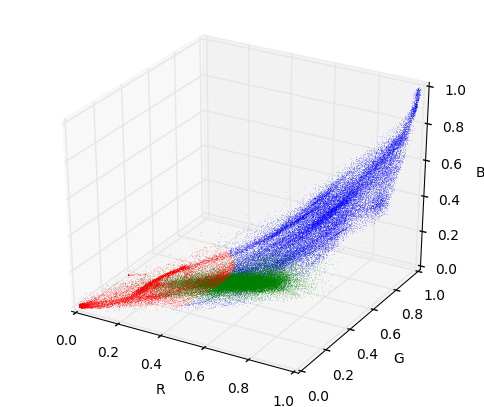

In [5]:
fig = plt.figure(figsize=(6, 5))
ax = fig.add_subplot(111, projection='3d')
for i in range(1, m + 1):
    data = x[label == i]
    ax.plot(data[:, 0], data[:, 1], data[:, 2], '.', markersize=0.1, label='Class ' + str(i))
ax.set_xlabel('R')
ax.set_ylabel('G')
ax.set_zlabel('B')
# ax.legend()
plt.show()

## 5 mixtures

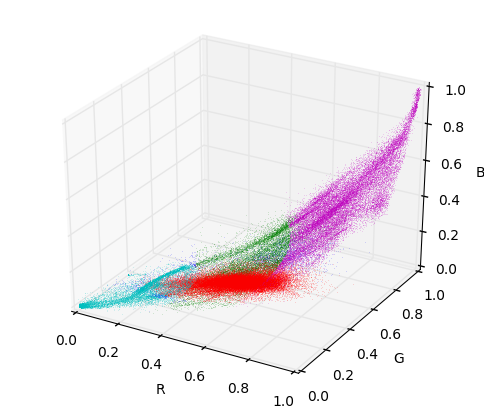

In [6]:
m = 5
gmm = mixture.GMM(m, covariance_type='full').fit(x)

label = gmm.predict(x) + 1

fig = plt.figure(figsize=(6, 5))
ax = fig.add_subplot(111, projection='3d')
for i in range(1, m + 1):
    data = x[label == i]
    ax.plot(data[:, 0], data[:, 1], data[:, 2], '.', markersize=0.1, label='Class ' + str(i))
ax.set_xlabel('R')
ax.set_ylabel('G')
ax.set_zlabel('B')
# ax.legend()
plt.show()

## 10 mixtures

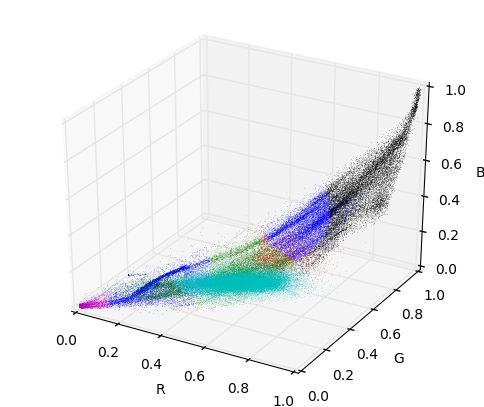

In [7]:
m = 10
gmm = mixture.GMM(m, covariance_type='full').fit(x)

label = gmm.predict(x) + 1

fig = plt.figure(figsize=(6, 5))
ax = fig.add_subplot(111, projection='3d')
for i in range(1, m + 1):
    data = x[label == i]
    ax.plot(data[:, 0], data[:, 1], data[:, 2], '.', markersize=0.1, label='Class ' + str(i))
ax.set_xlabel('R')
ax.set_ylabel('G')
ax.set_zlabel('B')
# ax.legend()
plt.show()

## Self figures

In [8]:
# read the image
img = plt.imread('./self.jpg') / 255

# reshape the input vector
x = np.reshape(img, (-1, 3))

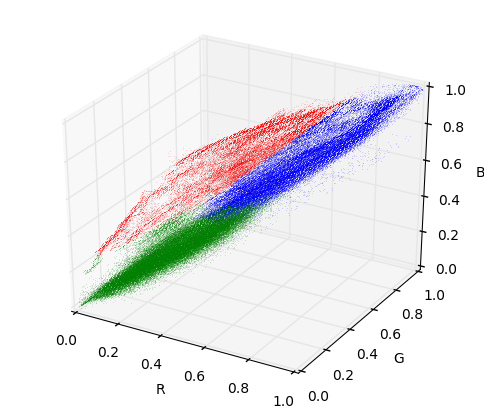

In [9]:
m = 3
gmm = mixture.GMM(m, covariance_type='full').fit(x)

label = gmm.predict(x) + 1

fig = plt.figure(figsize=(6, 5))
ax = fig.add_subplot(111, projection='3d')
for i in range(1, m + 1):
    data = x[label == i]
    ax.plot(data[:, 0], data[:, 1], data[:, 2], '.', markersize=0.1, label='Class ' + str(i))
ax.set_xlabel('R')
ax.set_ylabel('G')
ax.set_zlabel('B')
# ax.legend()
plt.show()

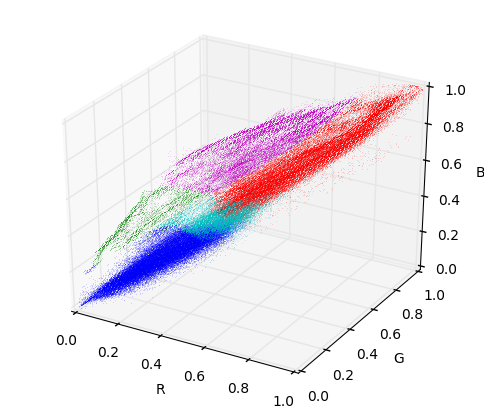

In [10]:
m = 5
gmm = mixture.GMM(m, covariance_type='full').fit(x)

label = gmm.predict(x) + 1

fig = plt.figure(figsize=(6, 5))
ax = fig.add_subplot(111, projection='3d')
for i in range(1, m + 1):
    data = x[label == i]
    ax.plot(data[:, 0], data[:, 1], data[:, 2], '.', markersize=0.1, label='Class ' + str(i))
ax.set_xlabel('R')
ax.set_ylabel('G')
ax.set_zlabel('B')
# ax.legend()
plt.show()

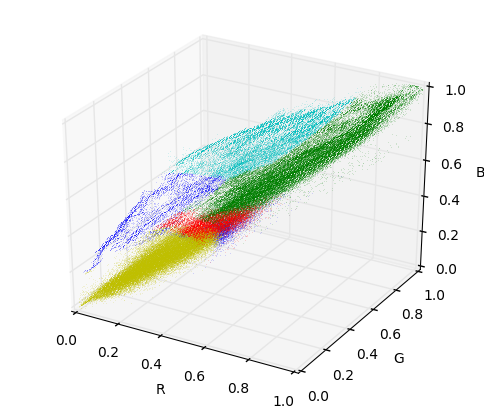

In [11]:
m = 10
gmm = mixture.GMM(m, covariance_type='full').fit(x)

label = gmm.predict(x) + 1

fig = plt.figure(figsize=(6, 5))
ax = fig.add_subplot(111, projection='3d')
for i in range(1, m + 1):
    data = x[label == i]
    ax.plot(data[:, 0], data[:, 1], data[:, 2], '.', markersize=0.1, label='Class ' + str(i))
ax.set_xlabel('R')
ax.set_ylabel('G')
ax.set_zlabel('B')
# ax.legend()
plt.show()